In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from dateutil.relativedelta import relativedelta

In [8]:
data = pd.read_csv('marketing_data.csv')
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [9]:
print(data['Dt_Customer'].value_counts())

8/31/12    12
9/12/12    11
2/14/13    11
5/12/14    11
5/22/14    10
           ..
8/5/12      1
3/9/13      1
4/2/14      1
3/27/14     1
8/14/13     1
Name: Dt_Customer, Length: 663, dtype: int64


In [15]:
# Explore the unique values and distribution of 'Income' variable
data[' Income '].value_counts()

$7,500.00      12
$35,860.00      4
$37,760.00      3
$80,134.00      3
$46,098.00      3
               ..
$78,420.00      1
$30,168.00      1
$57,333.00      1
$79,800.00      1
$5,648.00       1
Name:  Income , Length: 1974, dtype: int64

In [14]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [19]:
#Data Cleaning
data[' Income '] = data[' Income '].str.replace('$', '').str.replace(',', '').astype(float)  # Convert Income to numerical value
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'])  # Convert Dt_Customer to datetime

In [20]:
# Check summary statistics of 'Income' variable
print(data[' Income '].describe())

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name:  Income , dtype: float64


In [21]:
data.rename(columns={' Income ': 'Income'}, inplace=True)

In [22]:
missing_values = data['Income'].isnull()
missing_values

0       False
1       False
2       False
3       False
4       False
        ...  
2235    False
2236    False
2237    False
2238    False
2239    False
Name: Income, Length: 2240, dtype: bool

In [23]:
print(data['Education'].value_counts())
print(data['Marital_Status'].value_counts())

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64


In [25]:
# Group the data by education and marital status, calculate the mean income
grouped_data = data.groupby(['Education', 'Marital_Status'])['Income'].mean()

# Iterate over the missing values and impute based on similar education and marital status
for index, row in data[missing_values].iterrows():
    education = row['Education']
    marital_status = row['Marital_Status']
    data.loc[index, 'Income'] = grouped_data.loc[education, marital_status]

In [27]:
data['TotalChildren'] = data['Kidhome'] + data['Teenhome']

In [28]:
import datetime

current_year = datetime.datetime.now().year
data['Age'] = current_year - data['Year_Birth']

In [29]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalChildren,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,0,0,1,0,SP,0,53
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,0,0,1,1,0,CA,0,62


In [30]:
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['TotalSpending'] = data[spending_columns].sum(axis=1)

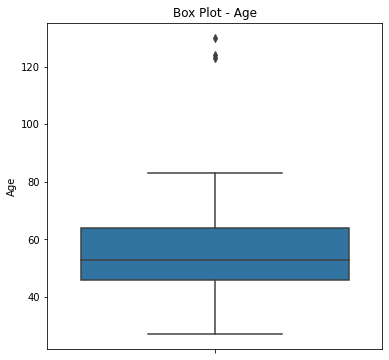

In [31]:
# Create a box plot for Age
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, y='Age')
plt.title('Box Plot - Age')
plt.show()

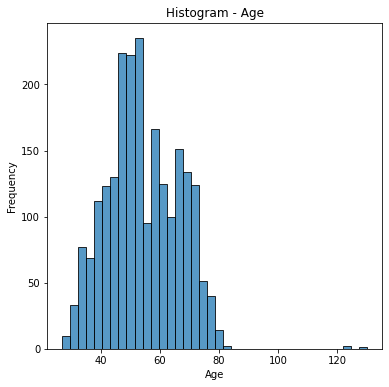

In [32]:
#Create a histogram for Age
plt.figure(figsize=(6, 6))
sns.histplot(data=data, x='Age')
plt.title('Histogram - Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

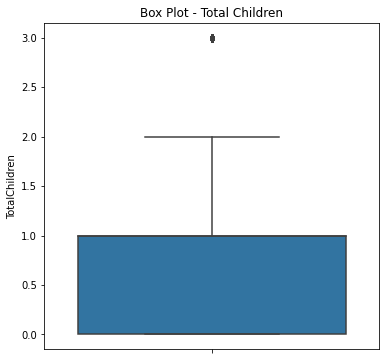

In [33]:
# Create a box plot for TotalChildren
plt.figure(figsize=(6, 6))
sns.boxplot(data=data, y='TotalChildren')
plt.title('Box Plot - Total Children')
plt.show()

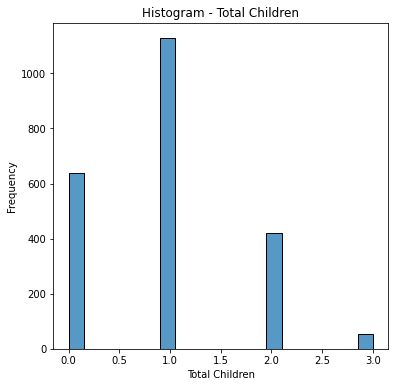

In [34]:
# Create a histogram for TotalChildren
plt.figure(figsize=(6, 6))
sns.histplot(data=data, x='TotalChildren')
plt.title('Histogram - Total Children')
plt.xlabel('Total Children')
plt.ylabel('Frequency')
plt.show()

In [35]:
from scipy.stats.mstats import winsorize

# Assuming you want to treat outliers in the 'Age' column
winsorized_age = winsorize(data['Age'], limits=[0.05, 0.05])  # Winsorize at 5th and 95th percentiles
data['Age'] = winsorized_age

In [36]:
# Assuming you want to trim outliers in the 'TotalSpending' column
lower_limit = data['TotalSpending'].quantile(0.05)
upper_limit = data['TotalSpending'].quantile(0.95)
trimmed_data = data[(data['TotalSpending'] >= lower_limit) & (data['TotalSpending'] <= upper_limit)]

In [37]:
lower_limit

22.0

In [38]:
upper_limit

1772.2999999999984

In [ ]:
# Assuming you want to treat outliers in the 'TotalChildren' column using z-score
from scipy import stats
z_scores = stats.zscore(data['TotalChildren'])
data = data[(z_scores >= -3) & (z_scores <= 3)]  # Remove values beyond 3 standard deviations

In [ ]:
# Assuming you want to treat outliers in the 'TotalSpending' column using IQR method
Q1 = data['TotalSpending'].quantile(0.25)
Q3 = data['TotalSpending'].quantile(0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
data = data[(data['TotalSpending'] >= lower_limit) & (data['TotalSpending'] <= upper_limit)]

In [39]:
lower_limit

22.0

In [40]:
data['TotalSpending'].value_counts()

data['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [41]:
from sklearn.preprocessing import OrdinalEncoder

In [42]:
# Initialize an ordinal encoder
ordinal_encoder = OrdinalEncoder(categories=[['Graduation','PhD','Master','2n Cycle','Basic']])
# Perform ordinal encoding on 'Education' column
data['Education_Encoded'] = ordinal_encoder.fit_transform(data[['Education']])

In [43]:
data.head(2)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalChildren,Age,TotalSpending,Education_Encoded
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,0,1,0,SP,0,53,1190,0.0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,0,1,1,0,CA,0,62,577,0.0


In [44]:
one_hot_encoded = pd.get_dummies(data['Marital_Status'], prefix='Marital')
data = pd.concat([data, one_hot_encoded], axis=1)


In [45]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,TotalSpending,Education_Encoded,Marital_Absurd,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,1190,0.0,0,0,1,0,0,0,0,0
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,577,0.0,0,0,0,0,1,0,0,0
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,251,0.0,0,0,0,1,0,0,0,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,11,0.0,0,0,0,0,0,1,0,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,91,0.0,0,0,0,0,1,0,0,0


In [46]:
# Dropping columns
data = data.drop(['Education', 'Marital_Status'], axis=1)

In [47]:
data.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,TotalSpending,Education_Encoded,Marital_Absurd,Marital_Alone,Marital_Divorced,Marital_Married,Marital_Single,Marital_Together,Marital_Widow,Marital_YOLO
0,1826,1970,84835.0,0,0,2014-06-16,0,189,104,379,...,1190,0.0,0,0,1,0,0,0,0,0
1,1,1961,57091.0,0,0,2014-06-15,0,464,5,64,...,577,0.0,0,0,0,0,1,0,0,0
2,10476,1958,67267.0,0,1,2014-05-13,0,134,11,59,...,251,0.0,0,0,0,1,0,0,0,0
3,1386,1967,32474.0,1,1,2014-05-11,0,10,0,1,...,11,0.0,0,0,0,0,0,1,0,0
4,5371,1989,21474.0,1,0,2014-04-08,0,6,16,24,...,91,0.0,0,0,0,0,1,0,0,0


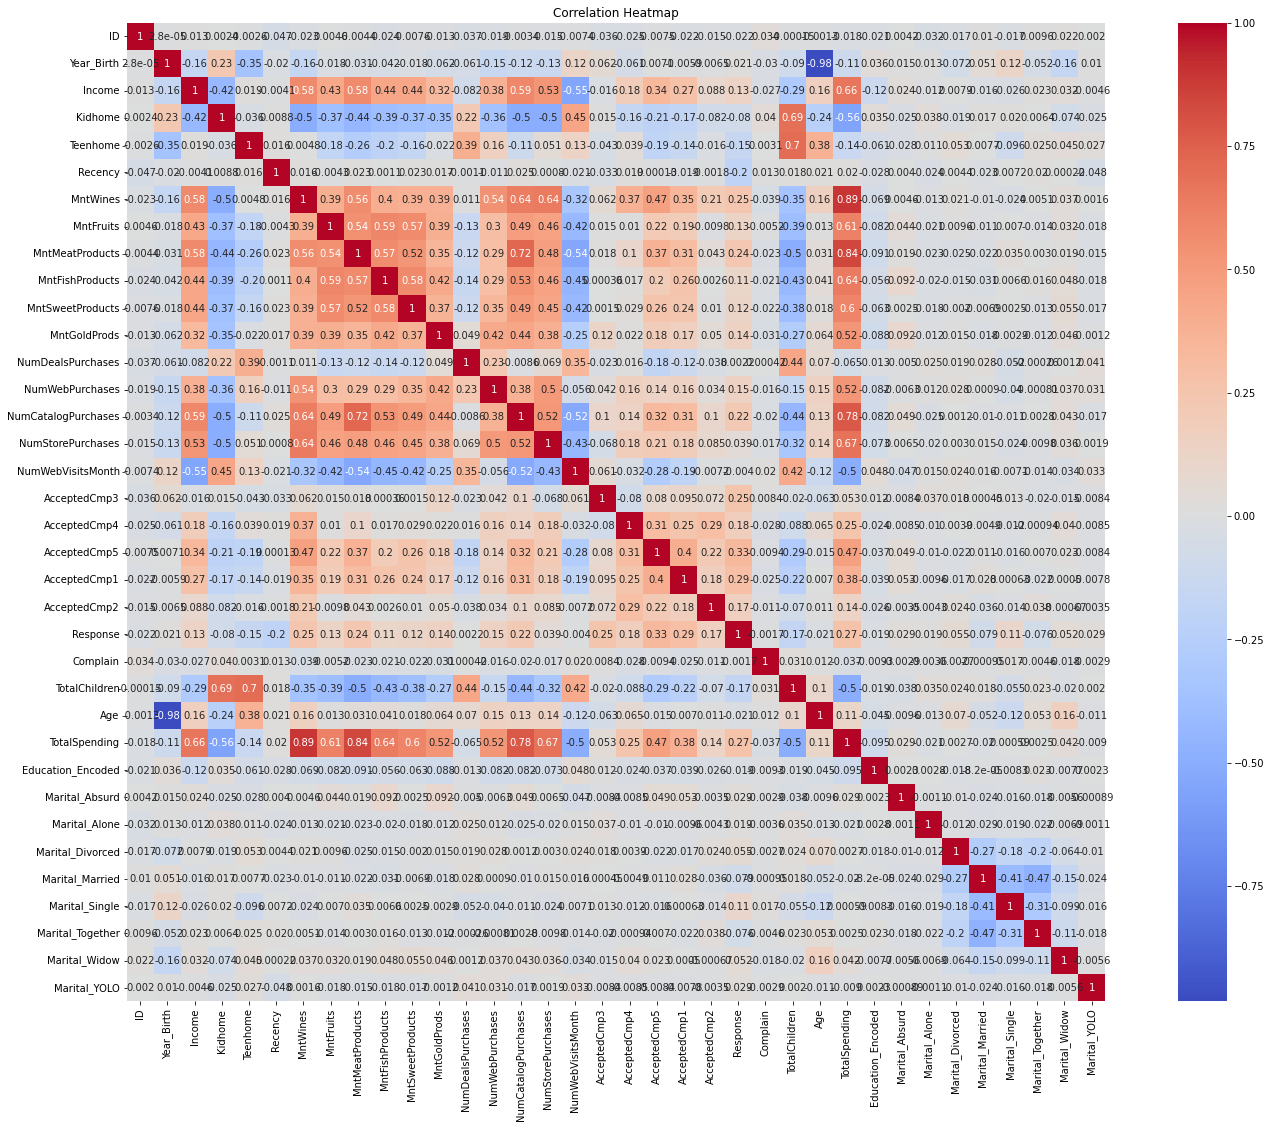

In [49]:
# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap using the correlation matrix
plt.figure(figsize=(26, 18))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Heatmap')
plt.show()

In [50]:
data['Age']

0       53
1       62
2       65
3       56
4       35
        ..
2235    47
2236    46
2237    47
2238    45
2239    54
Name: Age, Length: 2240, dtype: int64

In [51]:
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 59, 100], labels=['Younger', 'Older'])

In [52]:
data['AgeGroup'].value_counts()

Younger    1496
Older       744
Name: AgeGroup, dtype: int64

In [53]:
from scipy.stats import ttest_ind, chi2_contingency


In [62]:
# Analyze technology usage by age group
technology_usage =['NumWebVisitsMonth']
technology_stats = data.groupby('AgeGroup')[technology_usage].mean()

In [64]:
technology_usage = data.groupby('AgeGroup')['NumWebVisitsMonth'].mean().reset_index()

In [59]:
technology_stats

,NumWebVisitsMonth
AgeGroup,
Younger,5.560829
Older,4.825269


In [60]:
technology_usage

['NumWebVisitsMonth']

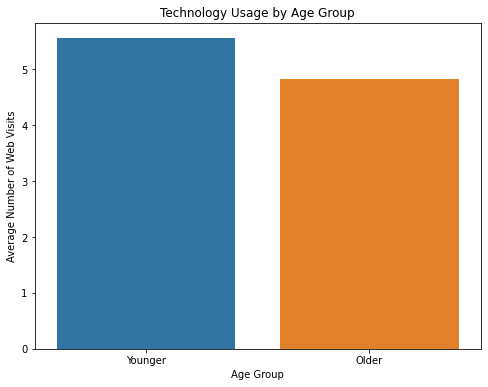

In [65]:
plt.figure(figsize=(8, 6))
sns.barplot(data=technology_usage, x='AgeGroup', y='NumWebVisitsMonth')
plt.title('Technology Usage by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Web Visits')
plt.show()

In [66]:
# Calculate the average number of in-store purchases by age group
avg_purchases = data.groupby('AgeGroup')['NumStorePurchases'].mean().reset_index()

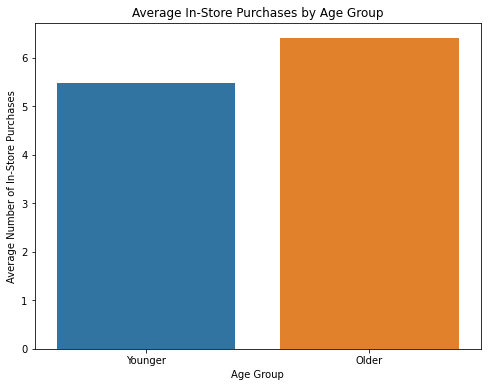

In [67]:
# Create a bar plot to compare in-store purchases by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_purchases, x='AgeGroup', y='NumStorePurchases')
plt.title('Average In-Store Purchases by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of In-Store Purchases')
plt.show()

In [68]:
# Group the data by the presence of kids (Kidhome)
data['HasKids'] = data['Kidhome'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [69]:
# Calculate the average number of store purchases and web purchases for each group
avg_store_purchaseskids = data.groupby('HasKids')['NumStorePurchases'].mean().reset_index()
avg_web_purchaseskids = data.groupby('HasKids')['NumWebPurchases'].mean().reset_index()

Text(0, 0.5, 'Average Number of Store Purchases')

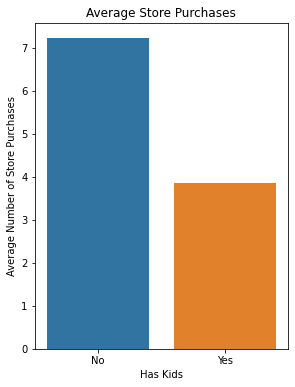

In [70]:
# Create a bar plot to compare store purchases and web purchases for customers with and without kids
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.barplot(data=avg_store_purchaseskids, x='HasKids', y='NumStorePurchases')
plt.title('Average Store Purchases')
plt.xlabel('Has Kids')
plt.ylabel('Average Number of Store Purchases')


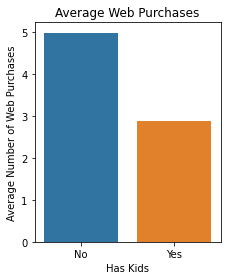

In [71]:
plt.subplot(1, 2, 2)
sns.barplot(data=avg_web_purchaseskids, x='HasKids', y='NumWebPurchases')
plt.title('Average Web Purchases')
plt.xlabel('Has Kids')
plt.ylabel('Average Number of Web Purchases')

plt.tight_layout()
plt.show()

o	Other distribution channels may cannibalize sales at the store.

In [72]:
# Calculate the total number of purchases for each distribution channel
data['TotalPurchases'] = data['NumStorePurchases'] + data['NumWebPurchases'] + data['NumCatalogPurchases']

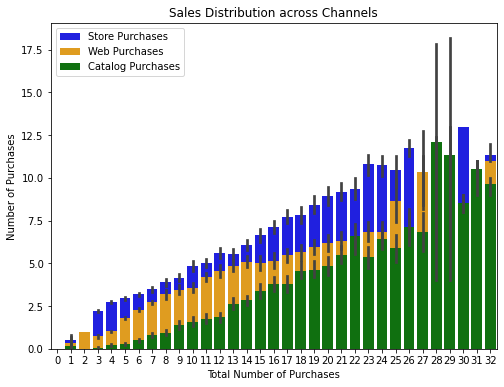

In [73]:
# Create a bar plot to compare the sales across distribution channels
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='TotalPurchases', y='NumStorePurchases', color='blue', label='Store Purchases')
sns.barplot(data=data, x='TotalPurchases', y='NumWebPurchases', color='orange', label='Web Purchases')
sns.barplot(data=data, x='TotalPurchases', y='NumCatalogPurchases', color='green', label='Catalog Purchases')
plt.title('Sales Distribution across Channels')
plt.xlabel('Total Number of Purchases')
plt.ylabel('Number of Purchases')
plt.legend()
plt.show()

o	Does the US fare significantly better than the rest of the world in terms of total purchases?



In [75]:
from scipy.stats import ttest_ind

# Split the data into US and non-US groups
us_data = data[data['Country'] == 'US']
non_us_data = data[data['Country'] != 'US']

# Perform t-test
t_statistic, p_value = ttest_ind(us_data['TotalPurchases'], non_us_data['TotalPurchases'], equal_var=False)

# Compare the p-value with the significance level (e.g., 0.05) to determine significance
alpha = 0.05
if p_value < alpha:
    print("The US fares significantly better than the rest of the world in terms of total purchases.")
else:
    print("There is no significant difference in total purchases between the US and the rest of the world.")

There is no significant difference in total purchases between the US and the rest of the world.


o	Which products are performing the best, and which are performing the least in terms of revenue?

In [76]:
# Calculate the total revenue for each product
data['TotalRevenue'] = (data['MntWines'] +
                        data['MntFruits'] +
                        data['MntMeatProducts'] +
                        data['MntFishProducts'] +
                        data['MntSweetProducts'] +
                        data['MntGoldProds'])

In [82]:
# Sort the products by total revenue in descending order
products_revenue = data[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']]
products_revenue = products_revenue.sum().sort_values(ascending=False)


In [83]:
# Print the best-performing and least-performing products
best_performing_product = products_revenue.index[0]
least_performing_product = products_revenue.index[-1]

In [84]:
print("Best-performing product in terms of revenue:", best_performing_product)
print("Least-performing product in terms of revenue:", least_performing_product)

Best-performing product in terms of revenue: MntWines
Least-performing product in terms of revenue: MntFruits


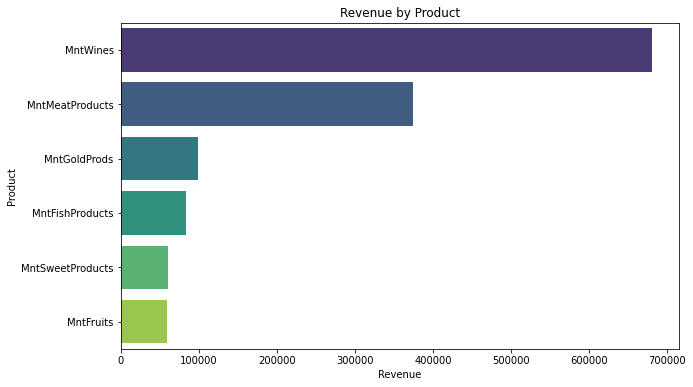

In [85]:
plt.figure(figsize=(10, 6))
sns.barplot(x=products_revenue.values, y=products_revenue.index, palette='viridis')
plt.title('Revenue by Product')
plt.xlabel('Revenue')
plt.ylabel('Product')
plt.show()

o	Is there any pattern between the age of customers and the last campaign acceptance rate?

In [87]:
# Group the data by age groups
data['AgeGroup'] = pd.cut(data['Age'], bins=[0, 30, 40, 50, 60, 100], labels=['<30', '30-40', '40-50', '50-60', '60+'])

# Calculate the acceptance rate for the last campaign by age group
acceptance_rate = data.groupby('AgeGroup')['AcceptedCmp5'].mean().reset_index()


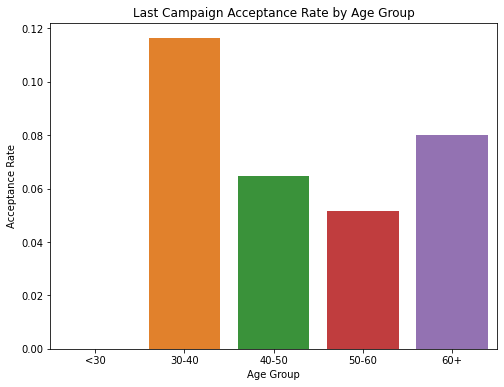

In [88]:
# Create a bar plot to visualize the acceptance rate by age group
plt.figure(figsize=(8, 6))
sns.barplot(data=acceptance_rate, x='AgeGroup', y='AcceptedCmp5')
plt.title('Last Campaign Acceptance Rate by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Acceptance Rate')
plt.show()

o	Which Country has the greatest number of customers who accepted the last campaign?

In [89]:
# Calculate the count of customers who accepted the last campaign by country
campaign_accepted = data[data['AcceptedCmp5'] == 1]['Country'].value_counts().reset_index()
campaign_accepted.columns = ['Country', 'AcceptedCount']


In [90]:
# Sort the data by the count of accepted customers in descending order
campaign_accepted = campaign_accepted.sort_values(by='AcceptedCount', ascending=False)

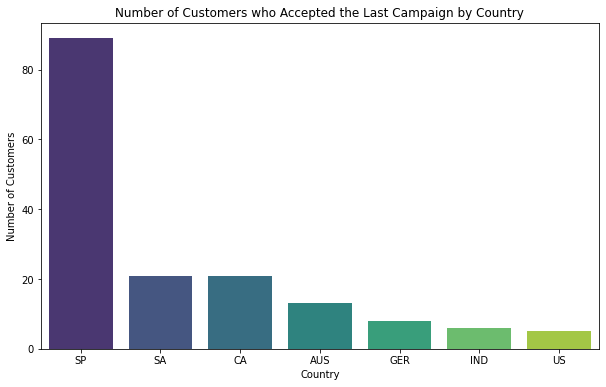

In [91]:
# Create a bar plot to visualize the number of customers who accepted the last campaign by country
plt.figure(figsize=(10, 6))
sns.barplot(data=campaign_accepted, x='Country', y='AcceptedCount', palette='viridis')
plt.title('Number of Customers who Accepted the Last Campaign by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.show()

In [92]:
country_with_max_accepted = campaign_accepted.iloc[0]['Country']
print("Country with the greatest number of customers who accepted the last campaign:", country_with_max_accepted)

Country with the greatest number of customers who accepted the last campaign: SP


In [93]:
# Group the data by the number of children at home
spending_by_children = data.groupby('Kidhome')['TotalSpending'].mean().reset_index()

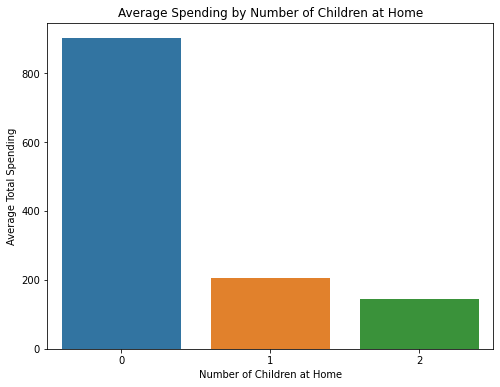

In [94]:
# Create a bar plot to visualize the average spending based on the number of children at home
plt.figure(figsize=(8, 6))
sns.barplot(data=spending_by_children, x='Kidhome', y='TotalSpending')
plt.title('Average Spending by Number of Children at Home')
plt.xlabel('Number of Children at Home')
plt.ylabel('Average Total Spending')
plt.show()

In [100]:
data.columns

Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Response', 'Complain', 'Country', 'TotalChildren', 'Age',
       'TotalSpending', 'Education_Encoded', 'Marital_Absurd', 'Marital_Alone',
       'Marital_Divorced', 'Marital_Married', 'Marital_Single',
       'Marital_Together', 'Marital_Widow', 'Marital_YOLO', 'AgeGroup',
       'HasKids', 'TotalPurchases', 'TotalRevenue'],
      dtype='object')

In [101]:
# Filter the data for customers who complained in the last 2 years
complaints_last_2_years = data[data['Complain'] == 1]

In [102]:
# Count the number of complaints by education background
complaints_by_education = complaints_last_2_years['Education_Encoded'].value_counts().reset_index()


In [104]:
complaints_by_education

,Education_Encoded,Complaints
0,0.0,14
1,3.0,4
2,2.0,2
3,1.0,1


In [105]:
data['Education_Encoded'].value_counts()

0.0    1127
1.0     486
2.0     370
3.0     203
4.0      54
Name: Education_Encoded, dtype: int64

In [107]:
data['Education_Encoded'].unique()

array([0., 1., 3., 2., 4.])